In [76]:
from matplotlib import pyplot as plt
from functions import *

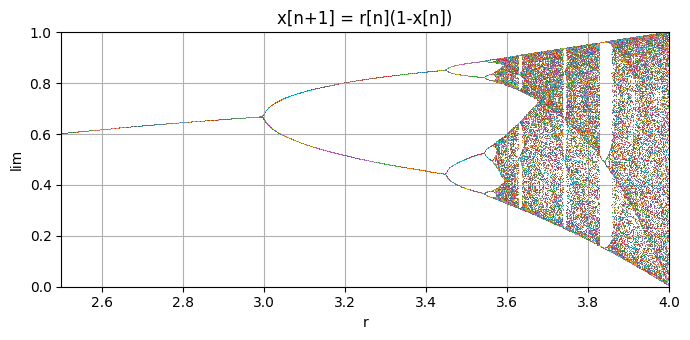

In [77]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x_precision = 1000
xvals = [x/x_precision for x in range(2*x_precision,4*x_precision)]

dots_to_draw = []
for x in xvals:
    peaks = logistic_map_asymptotes(x, 0.1)
    [dots_to_draw.append((x, y)) for y in peaks]

plt.xlim(2.5, 4)
plt.ylim(0, 1)
plt.grid()
for pair in dots_to_draw:
        #plt.plot(pair[0], pair[1], marker=",")
        plt.plot(pair[0], pair[1], marker=",")

plt.title("x[n+1] = r[n](1-x[n])")
plt.xlabel("r")
plt.ylabel("lim")
plt.show()


Test the “ordinal pattern” program with some “hand made”
examples:

In [78]:
def ordinal_symbol(ts: list, lag=1):
    if ts[0]<ts[1]:
        symbol = 1 if ts[1]<ts[2] else (2 if ts[2]>ts[0] else 4)
    else:
        symbol = 6 if ts[1]>ts[2] else (3 if ts[2]>ts[0] else 5)
    return symbol

In [108]:
print(all([
ordinal_symbol([5,2,7]) == 3,
ordinal_symbol([2,3,1]) == 4,
ordinal_symbol([1,2,3]) == 1,
ordinal_symbol([10,2,5]) == 5]))

True


For the logistic map with r=3.99, calculate the probabilities of
the 6 D=3 ordinal patterns and plot the distribution:

In [80]:
def logistic_map_no_transients(r: float, x0: float, depth: int = 11000, y_range_tolerance: int = 3) -> list:
    import numpy as np
    import matplotlib.pyplot as plt
    ser = [x0]*depth
    peaks =  []
    
    for xi in range (depth-1):
        ser[xi+1] = r*ser[xi]*(1-ser[xi]) #Logistic map formula

    series = ser[800:]
    
    return series

In [81]:
def ordinal_probability(ordinal: int, r: float):
    s = logistic_map_no_transients(r, 0.1)
    syms = [ordinal_symbol(s[xi:xi+3])for xi in range(len(s)-3)] 
    return syms.count(ordinal)/len(s)

Probability of D=3: 13.59%


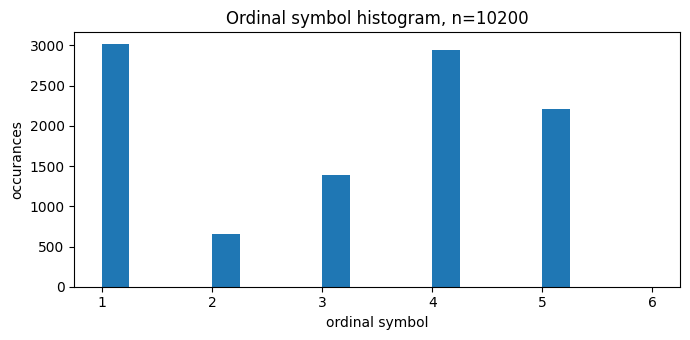

In [82]:
series = logistic_map_no_transients(3.99, 0.1)
logistics_map_symbols = [ordinal_symbol(series[xi:xi+3])for xi in range(len(series)-3)] 

print("Probability of D=3: " + str(round(100*ordinal_probability(3, 3.99), 2)) + "%")
plt.hist(logistics_map_symbols, 20,  range = [1,6])
plt.title("Ordinal symbol histogram, n=" + str(len(series)))
plt.xlabel("ordinal symbol")
plt.ylabel("occurances")
plt.show()

Calculate the ordinal bifurcation diagram with r in (3.5,4):

In [118]:
r_range = np.linspace(3.5, 4, 49)
for D in range(4,6):
    for r in r_range:
        print(r)


3.5
3.5104166666666665
3.5208333333333335
3.53125
3.5416666666666665
3.5520833333333335
3.5625
3.5729166666666665
3.5833333333333335
3.59375
3.6041666666666665
3.6145833333333335
3.625
3.6354166666666665
3.6458333333333335
3.65625
3.6666666666666665
3.6770833333333335
3.6875
3.6979166666666665
3.7083333333333335
3.71875
3.7291666666666665
3.7395833333333335
3.75
3.7604166666666665
3.7708333333333335
3.78125
3.7916666666666665
3.8020833333333335
3.8125
3.8229166666666665
3.8333333333333335
3.84375
3.8541666666666665
3.8645833333333335
3.875
3.8854166666666665
3.8958333333333335
3.90625
3.9166666666666665
3.9270833333333335
3.9375
3.9479166666666665
3.9583333333333335
3.96875
3.9791666666666665
3.9895833333333335
4.0
3.5
3.5104166666666665
3.5208333333333335
3.53125
3.5416666666666665
3.5520833333333335
3.5625
3.5729166666666665
3.5833333333333335
3.59375
3.6041666666666665
3.6145833333333335
3.625
3.6354166666666665
3.6458333333333335
3.65625
3.6666666666666665
3.6770833333333335
3.6875

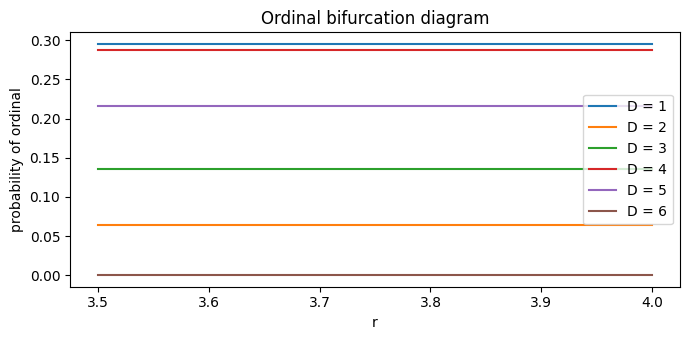

In [99]:
plt.xlabel("r")
plt.ylabel("probability of ordinal")
plt.title("Ordinal bifurcation diagram")
for D in range(1,7):
    plt.plot(r_range,ordinal_diagram_data[D-1],label = 'D = %s'%D)
plt.legend()
plt.show()

Calculate the ordinal bifurcation diagram with r in (3.5,4):